In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [40]:
df=pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/Placement_Data_Full_Class.csv",index_col=0)
df1=pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/Placement_Data_Full_Class.csv",index_col=0)

In [41]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [42]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [43]:
#dropped salary bcoz if salary=0 then obviously candidate is not-palaced and salary >0  then placed 
df.drop(columns=['salary'],axis=1,inplace=True)

In [44]:
df_dum=pd.get_dummies(df,drop_first=True).copy()

In [45]:
df_dum

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
sl_no,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
2,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
3,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
4,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
5,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,0,0,1
212,58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0,1
213,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,0,0,1,0,1


In [46]:
df_dum.isnull().sum()

ssc_p                    0
hsc_p                    0
degree_p                 0
etest_p                  0
mba_p                    0
gender_M                 0
ssc_b_Others             0
hsc_b_Others             0
hsc_s_Commerce           0
hsc_s_Science            0
degree_t_Others          0
degree_t_Sci&Tech        0
workex_Yes               0
specialisation_Mkt&HR    0
status_Placed            0
dtype: int64

In [47]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [48]:
X = df_dum.drop('status_Placed',axis=1)
Y = df_dum['status_Placed']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.3, 
                                                    random_state=2021)

In [50]:
y_test.shape

(65,)

In [51]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

std_scaler.fit(X_train)

x_std_train = std_scaler.transform(X_train.values)
x_std_test = std_scaler.transform(X_test.values)

In [52]:
X_train = pd.DataFrame(x_std_train,columns=X_train.columns)
X_test = pd.DataFrame(x_std_test,columns=X_test.columns)

In [53]:
X_train.shape

(150, 14)

In [54]:
df_dum.to_csv("campus_recruitment.csv",index=False)

In [55]:
#~~~~~~~~~~~~~~~~~~~~~DATA IS CLEANED~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [56]:
def calc_limits_IQR(df_dum, column):
    q1,q3 = df_dum[column].quantile([0.25,0.75])
    iqr = q3 - q1
    min_val = q1 - (1.5 * iqr)               
    max_val = q3 + (1.5 * iqr)
    return min_val, max_val

In [57]:
for col in X_train.columns:
    min_val, max_val = calc_limits_IQR(X_train, col)
    X_train.loc[X_train[col] < min_val,col] = min_val
    X_train.loc[X_train[col] > max_val,col] = max_val

In [58]:
df_dum.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.646512,0.460465,0.609302,0.525581,0.423256,0.051163,0.274419,0.344186,0.441860,0.688372
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.479168,0.499598,0.489045,0.500510,0.495228,0.220844,0.447262,0.476211,0.497767,0.464240
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


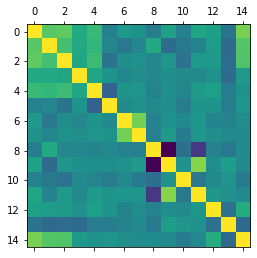

<Figure size 1440x864 with 0 Axes>

In [59]:
plt.matshow(df_dum.corr())
plt.figure(figsize=(20,12))
plt.show()

In [60]:
from sklearn.linear_model import Ridge

In [29]:
parameters = dict(alpha=np.linspace(0.001,40))

from sklearn.model_selection import GridSearchCV
clf = Ridge()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold)

In [30]:
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 8.17306122e-01, 1.63361224e+00, 2.44991837e+00,
       3.26622449e+00, 4.08253061e+00, 4.89883673e+00, 5.71514286e+00,
       6.53144898e+00, 7.34775510e+00, 8.16406122e+00, 8.98036735e+00,
       9.79667347e+00, 1.06129796e+01, 1.14292857e+01, 1.22455918e+01,...
       1.95923469e+01, 2.04086531e+01, 2.12249592e+01, 2.20412653e+01,
       2.28575714e+01, 2.36738776e+01, 2.44901837e+01, 2.53064898e+01,
       2.61227959e+01, 2.69391020e+01, 2.77554082e+01, 2.85717143e+01,
       2.93880204e+01, 3.02043265e+01, 3.10206327e+01, 3.18369388e+01,
       3.26532449e+01, 3.34695510e+01, 3.42858571e+01, 3.51021633e+01,
       3.59184694e+01, 3.67347755e+01, 3.75510816e+01, 3.83673878e+01,
       3.91836939e+01, 4.00000000e+01])})

In [31]:
print(cv.best_params_)

print(cv.best_score_)

{'alpha': 9.796673469387754}
0.4708507996218323


# ridge
roc:-{'alpha': 31.020632653061227}
0.941672941686671

accuracy:-{'alpha': 9.796673469387754}
0.4708507996218323

r2:-{'alpha': 9.796673469387754}
0.4708507996218323

In [61]:
#add ridge if you want
# Penalty is Sum of squares of coefficient
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=9.796673469387754)
ridge.fit(X_train,y_train)
ridge.coef_

array([ 2.08201227e-01,  1.01108589e-01,  1.00509746e-01, -2.99973402e-02,
       -1.00898800e-01,  5.04958198e-02, -2.04467215e-03,  1.62062493e-03,
       -4.63716975e-02, -2.11788701e-02,  1.18544702e-31, -7.92261085e-02,
        7.94729022e-02, -2.93893408e-02])

In [66]:
y_pred=ridge.predict(X_test)
y_test.shape

(65,)

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred) ** 0.5)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


0.32069259292152474
0.2719869415676729
0.5406820317878038


# lasso

In [33]:
from sklearn.linear_model import Lasso

parameters = dict(alpha=np.linspace(0.001,40))
from sklearn.model_selection import GridSearchCV
clf = Lasso()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold)

In [34]:
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 8.17306122e-01, 1.63361224e+00, 2.44991837e+00,
       3.26622449e+00, 4.08253061e+00, 4.89883673e+00, 5.71514286e+00,
       6.53144898e+00, 7.34775510e+00, 8.16406122e+00, 8.98036735e+00,
       9.79667347e+00, 1.06129796e+01, 1.14292857e+01, 1.22455918e+01,...
       1.95923469e+01, 2.04086531e+01, 2.12249592e+01, 2.20412653e+01,
       2.28575714e+01, 2.36738776e+01, 2.44901837e+01, 2.53064898e+01,
       2.61227959e+01, 2.69391020e+01, 2.77554082e+01, 2.85717143e+01,
       2.93880204e+01, 3.02043265e+01, 3.10206327e+01, 3.18369388e+01,
       3.26532449e+01, 3.34695510e+01, 3.42858571e+01, 3.51021633e+01,
       3.59184694e+01, 3.67347755e+01, 3.75510816e+01, 3.83673878e+01,
       3.91836939e+01, 4.00000000e+01])})

In [35]:
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

{'alpha': 0.001}
0.4671700163010746


roc_auc:-{'alpha': 0.001}
0.9333089475995655

accuracy:-{'alpha': 0.001}
0.4671700163010746

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001) 
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.22980592,  0.10094756,  0.10646206, -0.03134788, -0.11790083,
        0.05308192, -0.00344947, -0.        , -0.07810334, -0.05155321,
        0.        , -0.08853732,  0.0827961 , -0.02507568])

In [68]:
X_train=X_train.columns[abs(lasso.coef_)>0]

In [69]:
X=df_dum[X_train]

In [70]:
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
sl_no,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,1,1,1,0,1,0,1
2,79.33,78.33,77.48,86.5,66.28,1,0,0,1,1,1,0
3,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
4,56.00,52.00,52.00,66.0,59.43,1,0,0,1,1,0,1
5,85.80,73.60,73.30,96.8,55.50,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,1,1,1,0,0,0,0
212,58.00,60.00,72.00,74.0,53.62,1,1,0,1,1,0,0
213,67.00,67.00,73.00,59.0,69.72,1,1,1,0,0,1,0


In [71]:
df_new = pd.concat([X,Y],axis=1)

In [72]:
df_new

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
sl_no,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,1,1,1,0,1,0,1,1
2,79.33,78.33,77.48,86.5,66.28,1,0,0,1,1,1,0,1
3,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,1
4,56.00,52.00,52.00,66.0,59.43,1,0,0,1,1,0,1,0
5,85.80,73.60,73.30,96.8,55.50,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,1,1,1,0,0,0,0,1
212,58.00,60.00,72.00,74.0,53.62,1,1,0,1,1,0,0,1
213,67.00,67.00,73.00,59.0,69.72,1,1,1,0,0,1,0,1


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                                    test_size=0.30, random_state=7)

# KNN

In [326]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'n_neighbors': np.arange(1,20)}
print(parameters)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

knn = KNeighborsClassifier()
# Tuned according to accuracy score
cv = GridSearchCV(knn, param_grid=parameters,cv=kfold,scoring='r2')

cv.fit(X_train, y_train )
print(cv.best_params_)
print(cv.best_score_)
print(cv.best_estimator_)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}
{'n_neighbors': 19}
-0.49206349206349237
KNeighborsClassifier(n_neighbors=19)


roc:-{'n_neighbors': 13}
0.6005291005291006

accuracy:-{'n_neighbors': 19}
0.6866666666666665

log_loss:-{'n_neighbors': 17}
-0.6155945101430385

r2:-{'n_neighbors': 19}
-0.49206349206349237

# thus for knn value=19

In [74]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 3 19]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.60      0.14      0.22        22
           1       0.68      0.95      0.80        43

    accuracy                           0.68        65
   macro avg       0.64      0.54      0.51        65
weighted avg       0.66      0.68      0.60        65

0.676923076923077


In [75]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=uint8)

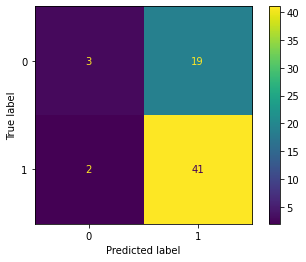

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,labels=[0,1])
plt.show()

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

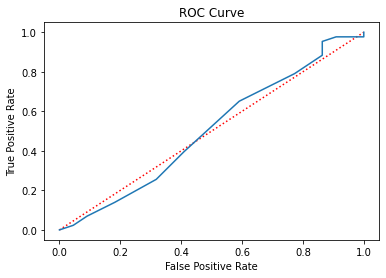

In [78]:
############ Plot ROC curve #############
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'r:')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [79]:
#########################################
roc_auc_score(y_test, y_pred_prob)

0.5036997885835095

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression() 
logreg.fit(X_train,y_train)

y_pred= logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))

#ROC CURVE

y_pred_prob = logreg.predict_proba(X_test)

[[ 1 21]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.14      0.05      0.07        22
           1       0.64      0.86      0.73        43

    accuracy                           0.58        65
   macro avg       0.39      0.45      0.40        65
weighted avg       0.47      0.58      0.51        65

accuracy:  0.5846153846153846


In [81]:
roc_auc_score(y_test,y_pred)

0.4529598308668076

# ?????????????????????????????????????????????????????????????

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kFold = StratifiedKFold(n_splits=5, random_state = 2021, shuffle=True)
results = cross_val_score(logreg, X,Y,cv=kFold, scoring='roc_auc')
print (results)
print("ROC_AUC ",results.mean(), results.std())
#Using accuracy score
results_acc = cross_val_score(logreg,X,Y,cv=kFold)
print(results_acc)
print("Accuracy Score: %.4f (%.4f)"%(results_acc.mean(), results_acc.std()))


[0.94358974 0.93076923 0.94871795 0.93842365 0.9137931 ]
ROC_AUC  0.9350587343690793 0.012176220926488748
[0.88372093 0.81395349 0.90697674 0.90697674 0.90697674]
Accuracy Score: 0.8837 (0.0360)


# Naive Bayes

[[ 0 22]
 [ 0 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.66      1.00      0.80        43

    accuracy                           0.66        65
   macro avg       0.33      0.50      0.40        65
weighted avg       0.44      0.66      0.53        65

accuracy 0.6615384615384615


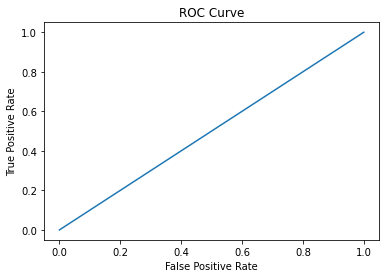

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,roc_curve

multinomial = MultinomialNB()
multinomial.fit(X_train,y_train)

y_probs = multinomial.predict_proba(X_test)
y_pred = multinomial.predict(X_test)
y_pred_prob = y_probs[:,1]

print(confusion_matrix(y_test, y_pred)) 
print(classification_report (y_test, y_pred)) 
print("accuracy",accuracy_score(y_test, y_pred))

## Generate ROC curve values:

fpr, tpr, thresholds = roc_curve (y_test, y_pred)

# Plot ROC curve

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [84]:
roc_auc_score(y_test, y_pred_prob)

0.5412262156448203

#  SVM Linear

In [85]:
from sklearn.svm import SVC

In [145]:
C_range = np.linspace(0.001,4)

param_grid = dict( C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)
svmGrid = GridSearchCV(SVC(probability=True,kernel='linear'), 
                       param_grid=param_grid, cv=kfold,scoring='neg_log_loss')
svmGrid.fit(X_train, y_train)

# Best Parameters
print(svmGrid.best_params_)
#print(svmGrid.cv_results_)
print(svmGrid.best_score_)

{'C': 1.1435714285714285}
-0.6144955225664209


roc:-{'C': 0.001}
0.5925925925925927

f1:-{'C': 0.001}
0.8235294117647058

neg_log_loss:-{'C': 1.1435714285714285}
-0.6144955225664209

accuracy:-{'C': 0.001}
0.7

# thus we select C=0.001

In [86]:
svc = SVC(C=0.001,probability = True,kernel='linear')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

#ROC
from sklearn.metrics import roc_curve, roc_auc_score

#Compute predicted probabilities: y_pred_prob
y_pred_prob = svc.predict_proba(X_test)[:,1]

#Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Where we will input the value as svm doesn't need us to pass any

[[ 0 22]
 [ 0 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.66      1.00      0.80        43

    accuracy                           0.66        65
   macro avg       0.33      0.50      0.40        65
weighted avg       0.44      0.66      0.53        65

0.6615384615384615


# SVM RBF

In [151]:
C_range = np.linspace(0.01,4,10)
gamma_range = np.linspace(0.001,10,10)

parameters = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)
svc = SVC(probability=True,kernel='rbf')

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)
svmGrid = GridSearchCV(svc, param_grid=parameters, cv=kfold,scoring='roc_auc',verbose=3)
svmGrid.fit(X_train, y_train)

# Best Parameters
print(svmGrid.best_params_)

print(svmGrid.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.693 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.001;, score=0.302 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=0.001;, score=0.566 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=0.001;, score=0.455 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=0.001;, score=0.444 total time=   0.0s
[CV 1/5] END ..C=0.01, gamma=1.1119999999999999;, score=0.548 total time=   0.0s
[CV 2/5] END ..C=0.01, gamma=1.1119999999999999;, score=0.582 total time=   0.0s
[CV 3/5] END ..C=0.01, gamma=1.1119999999999999;, score=0.500 total time=   0.0s
[CV 4/5] END ..C=0.01, gamma=1.1119999999999999;, score=0.458 total time=   0.0s
[CV 5/5] END ..C=0.01, gamma=1.1119999999999999;, score=0.492 total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=2.223;, score=0.500 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=2.22

[CV 5/5] END C=0.8966666666666667, gamma=1.1119999999999999;, score=0.513 total time=   0.0s
[CV 1/5] END .C=0.8966666666666667, gamma=2.223;, score=0.500 total time=   0.0s
[CV 2/5] END .C=0.8966666666666667, gamma=2.223;, score=0.524 total time=   0.0s
[CV 3/5] END .C=0.8966666666666667, gamma=2.223;, score=0.500 total time=   0.0s
[CV 4/5] END .C=0.8966666666666667, gamma=2.223;, score=0.500 total time=   0.0s
[CV 5/5] END .C=0.8966666666666667, gamma=2.223;, score=0.524 total time=   0.0s
[CV 1/5] END .C=0.8966666666666667, gamma=3.334;, score=0.500 total time=   0.0s
[CV 2/5] END .C=0.8966666666666667, gamma=3.334;, score=0.500 total time=   0.0s
[CV 3/5] END .C=0.8966666666666667, gamma=3.334;, score=0.500 total time=   0.0s
[CV 4/5] END .C=0.8966666666666667, gamma=3.334;, score=0.500 total time=   0.0s
[CV 5/5] END .C=0.8966666666666667, gamma=3.334;, score=0.500 total time=   0.0s
[CV 1/5] END .C=0.8966666666666667, gamma=4.445;, score=0.500 total time=   0.0s
[CV 2/5] END .C=

[CV 3/5] END .C=1.7833333333333334, gamma=2.223;, score=0.500 total time=   0.0s
[CV 4/5] END .C=1.7833333333333334, gamma=2.223;, score=0.500 total time=   0.0s
[CV 5/5] END .C=1.7833333333333334, gamma=2.223;, score=0.524 total time=   0.0s
[CV 1/5] END .C=1.7833333333333334, gamma=3.334;, score=0.500 total time=   0.0s
[CV 2/5] END .C=1.7833333333333334, gamma=3.334;, score=0.500 total time=   0.0s
[CV 3/5] END .C=1.7833333333333334, gamma=3.334;, score=0.500 total time=   0.0s
[CV 4/5] END .C=1.7833333333333334, gamma=3.334;, score=0.500 total time=   0.0s
[CV 5/5] END .C=1.7833333333333334, gamma=3.334;, score=0.500 total time=   0.0s
[CV 1/5] END .C=1.7833333333333334, gamma=4.445;, score=0.500 total time=   0.0s
[CV 2/5] END .C=1.7833333333333334, gamma=4.445;, score=0.500 total time=   0.0s
[CV 3/5] END .C=1.7833333333333334, gamma=4.445;, score=0.500 total time=   0.0s
[CV 4/5] END .C=1.7833333333333334, gamma=4.445;, score=0.500 total time=   0.0s
[CV 5/5] END .C=1.7833333333

[CV 5/5] END ...............C=2.67, gamma=2.223;, score=0.524 total time=   0.0s
[CV 1/5] END ...............C=2.67, gamma=3.334;, score=0.500 total time=   0.0s
[CV 2/5] END ...............C=2.67, gamma=3.334;, score=0.500 total time=   0.0s
[CV 3/5] END ...............C=2.67, gamma=3.334;, score=0.500 total time=   0.0s
[CV 4/5] END ...............C=2.67, gamma=3.334;, score=0.500 total time=   0.0s
[CV 5/5] END ...............C=2.67, gamma=3.334;, score=0.500 total time=   0.0s
[CV 1/5] END ...............C=2.67, gamma=4.445;, score=0.500 total time=   0.0s
[CV 2/5] END ...............C=2.67, gamma=4.445;, score=0.500 total time=   0.0s
[CV 3/5] END ...............C=2.67, gamma=4.445;, score=0.500 total time=   0.0s
[CV 4/5] END ...............C=2.67, gamma=4.445;, score=0.500 total time=   0.0s
[CV 5/5] END ...............C=2.67, gamma=4.445;, score=0.500 total time=   0.0s
[CV 1/5] END ...............C=2.67, gamma=5.556;, score=0.500 total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END .C=3.5566666666666666, gamma=2.223;, score=0.500 total time=   0.0s
[CV 5/5] END .C=3.5566666666666666, gamma=2.223;, score=0.524 total time=   0.0s
[CV 1/5] END .C=3.5566666666666666, gamma=3.334;, score=0.500 total time=   0.0s
[CV 2/5] END .C=3.5566666666666666, gamma=3.334;, score=0.500 total time=   0.0s
[CV 3/5] END .C=3.5566666666666666, gamma=3.334;, score=0.500 total time=   0.0s
[CV 4/5] END .C=3.5566666666666666, gamma=3.334;, score=0.500 total time=   0.0s
[CV 5/5] END .C=3.5566666666666666, gamma=3.334;, score=0.500 total time=   0.0s
[CV 1/5] END .C=3.5566666666666666, gamma=4.445;, score=0.500 total time=   0.0s
[CV 2/5] END .C=3.5566666666666666, gamma=4.445;, score=0.500 total time=   0.0s
[CV 3/5] END .C=3.5566666666666666, gamma=4.445;, score=0.500 total time=   0.0s
[CV 4/5] END .C=3.5566666666666666, gamma=4.445;, score=0.500 total time=   0.0s
[CV 5/5] END .C=3.5566666666666666, gamma=4.445;, score=0.500 total time=   0.0s
[CV 1/5] END .C=3.5566666666

roc_auc:-{'C': 0.45333333333333337, 'gamma': 1.1119999999999999}
0.5412698412698413

f1:-{'C': 0.01, 'gamma': 0.001}
0.8235294117647058

neg_log_loss:-{'C': 0.45333333333333337, 'gamma': 6.667000000000001}
-0.6108743772785965

accuracy:-{'C': 0.01, 'gamma': 0.001}
0.7

# thus c=0.01 & gamma=0.001

In [87]:
svc = SVC(C=0.01,gamma=0.001,probability = True,kernel='rbf')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("accuracy ",accuracy_score(y_test, y_pred))

#ROC
from sklearn.metrics import roc_curve, roc_auc_score

#Compute predicted probabilities: y_pred_prob
y_pred_prob = svc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

# Where we will input the value as svm doesn't need us to pass any 

[[ 0 22]
 [ 0 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.66      1.00      0.80        43

    accuracy                           0.66        65
   macro avg       0.33      0.50      0.40        65
weighted avg       0.44      0.66      0.53        65

accuracy  0.6615384615384615


0.5465116279069767

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [342]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=2018)


from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)

cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold)

cv.fit(X_train,y_train)
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)


{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.72


In [90]:
clf = DecisionTreeClassifier(max_depth=3,
                             random_state=2021)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test,y_pred))

[[ 4 18]
 [ 9 34]]
              precision    recall  f1-score   support

           0       0.31      0.18      0.23        22
           1       0.65      0.79      0.72        43

    accuracy                           0.58        65
   macro avg       0.48      0.49      0.47        65
weighted avg       0.54      0.58      0.55        65

accuracy:  0.5846153846153846


## Out of every accuracy knn is higher

In [344]:
s=pd.DataFrame()
g={}
for i in range(len(X.columns)):
    g[X.iloc[:,i].name]= input("please enter the "+X.iloc[:,i].name+"  ")

please enter the ssc_p  54
please enter the hsc_p  54
please enter the degree_p  45
please enter the etest_p  74
please enter the mba_p  87
please enter the gender_M  1
please enter the ssc_b_Others  1
please enter the hsc_s_Commerce  1
please enter the hsc_s_Science  0
please enter the degree_t_Sci&Tech  0
please enter the workex_Yes  0
please enter the specialisation_Mkt&HR  0


In [345]:
s=pd.DataFrame([g])

In [346]:
if(knn.predict(s)==1):
   print("placed")
   s['status_Placed']=1
else:
   print("not placed")


placed


# regression for salary

In [352]:
df_dum=pd.get_dummies(df1,drop_first=True).copy()

In [353]:
#dropped salary bcoz if salary=0 then obviously candidate is not-palaced and salary >0  then placed 
df_dum.drop(columns=['hsc_b_Others','degree_t_Others'],axis=1,inplace=True)

In [354]:
df_dum

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
sl_no,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,0,1,0,1,1
2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,0,1,1,1,0,1
3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,1
4,56.00,52.00,52.00,66.0,59.43,0.0,1,0,0,1,1,0,1,0
5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.0,1,1,1,0,0,0,0,1
212,58.00,60.00,72.00,74.0,53.62,275000.0,1,1,0,1,1,0,0,1
213,67.00,67.00,73.00,59.0,69.72,295000.0,1,1,1,0,0,1,0,1


In [355]:
df_dum['salary']=df_dum['salary'].fillna(0)

In [356]:
df_dum.isnull().sum()

ssc_p                    0
hsc_p                    0
degree_p                 0
etest_p                  0
mba_p                    0
salary                   0
gender_M                 0
ssc_b_Others             0
hsc_s_Commerce           0
hsc_s_Science            0
degree_t_Sci&Tech        0
workex_Yes               0
specialisation_Mkt&HR    0
status_Placed            0
dtype: int64

In [357]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [358]:
X= df_dum.drop('salary',axis=1)
Y= df_dum['salary']

In [359]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                                    test_size=0.30, random_state=7)

In [360]:
parameters = dict(alpha=np.linspace(0.001,40))

from sklearn.model_selection import GridSearchCV
clf = Ridge()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

In [361]:
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 8.17306122e-01, 1.63361224e+00, 2.44991837e+00,
       3.26622449e+00, 4.08253061e+00, 4.89883673e+00, 5.71514286e+00,
       6.53144898e+00, 7.34775510e+00, 8.16406122e+00, 8.98036735e+00,
       9.79667347e+00, 1.06129796e+01, 1.14292857e+01, 1.22455918e+01,...
       2.28575714e+01, 2.36738776e+01, 2.44901837e+01, 2.53064898e+01,
       2.61227959e+01, 2.69391020e+01, 2.77554082e+01, 2.85717143e+01,
       2.93880204e+01, 3.02043265e+01, 3.10206327e+01, 3.18369388e+01,
       3.26532449e+01, 3.34695510e+01, 3.42858571e+01, 3.51021633e+01,
       3.59184694e+01, 3.67347755e+01, 3.75510816e+01, 3.83673878e+01,
       3.91836939e+01, 4.00000000e+01])},
             scoring='roc_auc')

In [362]:
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

{'alpha': 0.001}
0.6777944686045373


r2:-{'alpha': 11.429285714285713}
0.03515597572616187

accuracy:-{'alpha': 11.429285714285713}
0.03515597572616187

roc_auc:-{'alpha': 0.8173061224489796}
0.6918887303898745

In [363]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=11.429285714285713)
ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.00256845, -0.00381558, -0.00214127,  0.00198809,  0.0141294 ,
       -0.09567378,  0.03649227,  0.06262693,  0.00018188,  0.07626067,
        0.08191904,  0.15269611,  0.08973009])

# Lasso

In [364]:
from sklearn.linear_model import Lasso

parameters = dict(alpha=np.linspace(0.001,40))
from sklearn.model_selection import GridSearchCV
clf = Lasso()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,scoring='roc_auc',
                  cv=kfold)

In [365]:
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 8.17306122e-01, 1.63361224e+00, 2.44991837e+00,
       3.26622449e+00, 4.08253061e+00, 4.89883673e+00, 5.71514286e+00,
       6.53144898e+00, 7.34775510e+00, 8.16406122e+00, 8.98036735e+00,
       9.79667347e+00, 1.06129796e+01, 1.14292857e+01, 1.22455918e+01,...
       2.28575714e+01, 2.36738776e+01, 2.44901837e+01, 2.53064898e+01,
       2.61227959e+01, 2.69391020e+01, 2.77554082e+01, 2.85717143e+01,
       2.93880204e+01, 3.02043265e+01, 3.10206327e+01, 3.18369388e+01,
       3.26532449e+01, 3.34695510e+01, 3.42858571e+01, 3.51021633e+01,
       3.59184694e+01, 3.67347755e+01, 3.75510816e+01, 3.83673878e+01,
       3.91836939e+01, 4.00000000e+01])},
             scoring='roc_auc')

In [366]:
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

{'alpha': 0.001}
0.6765383501573433


accuracy:-{'alpha': 0.001}
0.00896378773206492

r2:-{'alpha': 0.001}
0.00896378773206492

roc_auc:-{'alpha': 0.001}
0.6887954289544679

In [367]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001) #0.01
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00071014, -0.0050186 , -0.00317036,  0.0028502 ,  0.0145593 ,
       -0.13888729,  0.04834072,  0.12102803,  0.00466078,  0.13538811,
        0.11200844,  0.21464534,  0.17522554])

In [368]:
X_train=X_train.columns[abs(lasso.coef_)>0]

In [369]:
X=df_dum[X_train]

In [370]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                                    test_size=0.30, random_state=7)

In [371]:
model_linear=LinearRegression().fit(X_train,Y_train)
model_dtree=DecisionTreeRegressor().fit(X_train,Y_train)

In [372]:
from sklearn.metrics import r2_score
pred_linear=model_linear.predict(X_test)
r2_score(Y_test,pred_linear)

0.885604544221124

In [373]:
pred_dtree=model_dtree.predict(X_test)
r2_score(Y_test,pred_dtree)

0.3945422183558598

In [374]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, pred_linear)
rmse_linear = mean_squared_error(Y_test, pred_linear) ** 0.5
rmse_linear

48159.825721978836

In [375]:
mean_squared_error(Y_test, pred_dtree)
rmse_dtree = mean_squared_error(Y_test, pred_dtree) ** 0.5
rmse_dtree

110795.58447186214

In [376]:
model_linear.predict(s)

array([437317.74143244])